# Importing Libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [14]:
import tensorflow
tensorflow.__version__

'2.4.0'

In [31]:
from tensorflow.keras.models import Sequential  # used to create neural network (a sequesnce of layers)
from tensorflow.keras.layers import Dense # one neuron in one layer connected to all other layers in the next layer
from keras.utils import np_utils

# Loading Dataset

In [2]:
data = pd.read_csv('Chatty_train.csv')

In [12]:
data.head(3)

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngVelocity_Timestamp,AngV_X,AngV_Y,AngV_Z,MagField_Timestamp,Mag_X,Mag_Y,Mag_Z,Orientation_Timestamp,Orin_X,Orin_Y,Orin_Z,Activity
0,10-11-2019 19:05:56.381,-0.131576,-0.086370,9.398655,10-11-2019 19:05:56.374,-0.008043,0.006485,-0.013777,10-11-2019 19:05:56.381,21.740547,-3.269182,-26.693754,10-11-2019 19:05:56.381,-77.395704,-0.891910,1.271720,Vibration
1,10-11-2019 19:05:56.391,-0.122146,0.239352,9.314530,10-11-2019 19:05:56.384,-0.006196,-0.003392,-0.014942,10-11-2019 19:05:56.391,17.138367,-10.707533,-22.636873,10-11-2019 19:05:56.391,-77.394480,-0.890001,1.269079,Vibration
2,10-11-2019 19:05:56.400,0.095950,0.429307,9.773775,10-11-2019 19:05:56.394,0.002659,0.011626,-0.012663,10-11-2019 19:05:56.401,17.138367,-10.707533,-22.636873,10-11-2019 19:05:56.401,-77.393229,-0.891062,1.267604,Vibration


In [4]:
# Good practice to create a backup of your data

df = data.copy()

In [11]:
df.head(3)

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngVelocity_Timestamp,AngV_X,AngV_Y,AngV_Z,MagField_Timestamp,Mag_X,Mag_Y,Mag_Z,Orientation_Timestamp,Orin_X,Orin_Y,Orin_Z,Activity
0,10-11-2019 19:05:56.381,-0.131576,-0.086370,9.398655,10-11-2019 19:05:56.374,-0.008043,0.006485,-0.013777,10-11-2019 19:05:56.381,21.740547,-3.269182,-26.693754,10-11-2019 19:05:56.381,-77.395704,-0.891910,1.271720,Vibration
1,10-11-2019 19:05:56.391,-0.122146,0.239352,9.314530,10-11-2019 19:05:56.384,-0.006196,-0.003392,-0.014942,10-11-2019 19:05:56.391,17.138367,-10.707533,-22.636873,10-11-2019 19:05:56.391,-77.394480,-0.890001,1.269079,Vibration
2,10-11-2019 19:05:56.400,0.095950,0.429307,9.773775,10-11-2019 19:05:56.394,0.002659,0.011626,-0.012663,10-11-2019 19:05:56.401,17.138367,-10.707533,-22.636873,10-11-2019 19:05:56.401,-77.393229,-0.891062,1.267604,Vibration


### Droping all the other timestamps not needed

In [8]:
df = df.drop(['AngVelocity_Timestamp','AngVelocity_Timestamp','MagField_Timestamp','Orientation_Timestamp'],axis=1)

In [10]:
df.head(3)

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,10-11-2019 19:05:56.381,-0.131576,-0.086370,9.398655,-0.008043,0.006485,-0.013777,21.740547,-3.269182,-26.693754,-77.395704,-0.891910,1.271720,Vibration
1,10-11-2019 19:05:56.391,-0.122146,0.239352,9.314530,-0.006196,-0.003392,-0.014942,17.138367,-10.707533,-22.636873,-77.394480,-0.890001,1.269079,Vibration
2,10-11-2019 19:05:56.400,0.095950,0.429307,9.773775,0.002659,0.011626,-0.012663,17.138367,-10.707533,-22.636873,-77.393229,-0.891062,1.267604,Vibration


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103851 entries, 0 to 103850
Data columns (total 14 columns):
Acceleration_Timestamp    103851 non-null object
Acc_X                     103851 non-null float64
Acc_Y                     103851 non-null float64
Acc_Z                     103851 non-null float64
AngV_X                    103851 non-null float64
AngV_Y                    103851 non-null float64
AngV_Z                    103851 non-null float64
Mag_X                     103851 non-null float64
Mag_Y                     103851 non-null float64
Mag_Z                     103851 non-null float64
Orin_X                    103851 non-null float64
Orin_Y                    103851 non-null float64
Orin_Z                    103851 non-null float64
Activity                  103851 non-null object
dtypes: float64(12), object(2)
memory usage: 11.1+ MB


## Encoding Categorical Data

#### Label Encoding the "Activity" column

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Activity_class = le.fit_transform(df['Activity'])


In [19]:
Activity_class

array([3, 3, 3, ..., 2, 2, 2])

In [20]:
Activity_class.shape

(103851,)

#### Selecting values for X and y

In [25]:
X= df.iloc[:, 1:-1].values
y = Activity_class


## Splitting the dataset into the Training and test set

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Creating encoding for the classes in the output data

In [32]:

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [33]:
y_train

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Neural Network (Training)

 [Link to the Keras Documentation](https://keras.io/api/) 


In [34]:
# Structure of the network
# we have 12 input features and 5 classes

(12 + 5) /2

8.5

In [37]:
# Neural network Strcuture  ====  12 -> 9 -> 9 -> 5

# Initializing the ANN
network = Sequential()

# Adding the input layer and the first hidden layer
network.add(Dense(input_shape = (12,), units = 9, activation = 'relu'))

#Adding the second hidden layer
network.add(Dense(units=9, activation='relu'))

# Adding the output layer
network.add(Dense(units = 5, activation='softmax'))


In [38]:
# Compiling the ANN
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [73]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 117       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Fit function initiates the training of the neural network - (Training the ANN on the Training set)

history = network.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
650/650 [==============================] - 4s 4ms/step - loss: 1.3970 - accuracy: 0.4972: 0s - loss: 1.5072 - 
Epoch 2/10
650/650 [==============================] - 3s 4ms/step - loss: 0.2195 - accuracy: 0.9424
Epoch 3/10
650/650 [==============================] - 2s 3ms/step - loss: 0.0859 - accuracy: 0.9781
Epoch 4/10
650/650 [==============================] - 2s 3ms/step - loss: 0.0506 - accuracy: 0.9870
Epoch 5/10
650/650 [==============================] - 2s 3ms/step - loss: 0.0377 - accuracy: 0.9903
Epoch 6/10
650/650 [==============================] - 2s 3ms/step - loss: 0.0283 - accuracy: 0.9930
Epoch 7/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0222 - accuracy: 0.9951: 0s - loss: 0.0224 - accura
Epoch 8/10
650/650 [==============================] - 3s 4ms/step - loss: 0.0161 - accuracy: 0.9961
Epoch 9/10
650/650 [==============================] - 2s 3ms/step - loss: 0.0116 - accuracy: 0.9970
Epoch 10/10
650/650 [=============================

# Neural network (evaluation)

In [40]:
# The history variable allows us to get the history of the training. We can see the loss and accuracy.

history.history.keys()

dict_keys(['loss', 'accuracy'])

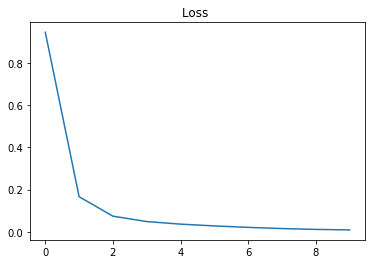

In [42]:
plt.plot(history.history['loss'])
plt.title('Loss ')
plt.show()

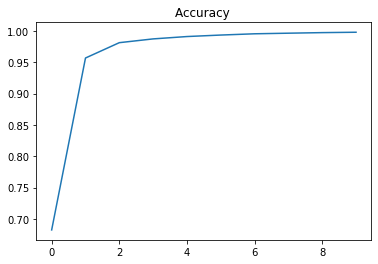

In [43]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy ')
plt.show()

In [44]:
# Evaluating the algorithm

accuracy_test = network.evaluate(X_test, y_test)

650/650 [==============================] - 1s 919us/step - loss: 0.0082 - accuracy: 0.9977


From the results above we can see that the real <b>loss is: 0.0082</b> and the real <b>accuracy is: 0.9977</b> 

In [45]:
predictions = network.predict(X_test)

#### Notice we will have 5 values below, one prediction for each class of our Activity (class variable)

In [47]:
predictions[0]

array([9.9998736e-01, 3.3375898e-07, 2.9051305e-06, 4.3267559e-07,
       8.9533833e-06], dtype=float32)

In [69]:
 y_test[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [72]:
np.argmax(predictions[0])

0

In [76]:
print(df['Activity'][np.argmax(predictions[0])])

Vibration


In [77]:
df.head(3)

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,10-11-2019 19:05:56.381,-0.131576,-0.086370,9.398655,-0.008043,0.006485,-0.013777,21.740547,-3.269182,-26.693754,-77.395704,-0.891910,1.271720,Vibration
1,10-11-2019 19:05:56.391,-0.122146,0.239352,9.314530,-0.006196,-0.003392,-0.014942,17.138367,-10.707533,-22.636873,-77.394480,-0.890001,1.269079,Vibration
2,10-11-2019 19:05:56.400,0.095950,0.429307,9.773775,0.002659,0.011626,-0.012663,17.138367,-10.707533,-22.636873,-77.393229,-0.891062,1.267604,Vibration


# Testing model on Unseen Dataset

In [86]:
unseen_df= pd.read_csv('Chatty_unseen_test.csv')

In [87]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25333 entries, 0 to 25332
Data columns (total 17 columns):
Acceleration_Timestamp    25333 non-null object
Acc_X                     25333 non-null float64
Acc_Y                     25333 non-null float64
Acc_Z                     25333 non-null float64
AngVelocity_Timestamp     25333 non-null object
AngV_X                    25333 non-null float64
AngV_Y                    25333 non-null float64
AngV_Z                    25333 non-null float64
MagField_Timestamp        25333 non-null object
Mag_X                     25333 non-null float64
Mag_Y                     25333 non-null float64
Mag_Z                     25333 non-null float64
Orientation_Timestamp     25333 non-null object
Orin_X                    25333 non-null float64
Orin_Y                    25333 non-null float64
Orin_Z                    25333 non-null float64
Activity                  25333 non-null object
dtypes: float64(12), object(5)
memory usage: 3.3+ MB


In [88]:
unseen_df.head(3)

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngVelocity_Timestamp,AngV_X,AngV_Y,AngV_Z,MagField_Timestamp,Mag_X,Mag_Y,Mag_Z,Orientation_Timestamp,Orin_X,Orin_Y,Orin_Z,Activity
0,10-11-2019 19:09:11.942,-0.039518,0.061223,9.225316,10-11-2019 19:09:11.935,-0.003344,0.007547,-0.011374,10-11-2019 19:09:11.942,-38.403454,71.784752,26.648933,10-11-2019 19:09:11.942,-77.627394,-0.741489,1.230980,Vibration
1,10-11-2019 19:09:11.952,0.158520,0.417781,9.044642,10-11-2019 19:09:11.945,-0.004196,-0.001461,-0.012413,10-11-2019 19:09:11.952,-38.403454,71.784752,26.648933,10-11-2019 19:09:11.952,-77.626883,-0.741244,1.229572,Vibration
2,10-11-2019 19:09:11.962,-0.248034,0.344883,10.249486,10-11-2019 19:09:11.955,0.000868,0.002855,-0.015191,10-11-2019 19:09:11.962,-32.937233,74.560638,22.709229,10-11-2019 19:09:11.962,-77.625985,-0.742044,1.224206,Vibration


In [89]:
unseen_df_2 = unseen_df.drop(['AngVelocity_Timestamp','AngVelocity_Timestamp','MagField_Timestamp','Orientation_Timestamp'],axis=1)

In [90]:
unseen_df_2.head(2)

,Acceleration_Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity
0,10-11-2019 19:09:11.942,-0.039518,0.061223,9.225316,-0.003344,0.007547,-0.011374,-38.403454,71.784752,26.648933,-77.627394,-0.741489,1.230980,Vibration
1,10-11-2019 19:09:11.952,0.158520,0.417781,9.044642,-0.004196,-0.001461,-0.012413,-38.403454,71.784752,26.648933,-77.626883,-0.741244,1.229572,Vibration


In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

UnS_Act_class = le.fit_transform(unseen_df_2['Activity'])

In [92]:
UnS_Act_class

array([3, 3, 3, ..., 2, 2, 2])

In [93]:
# selecting x and y values for the unseen data

X_u= unseen_df_2.iloc[:, 1:-1].values
y_u = UnS_Act_class


scaling the feature

In [94]:
X_u = sc.fit_transform(X_u)

In [98]:
# Encoding the classes 
y_u = np_utils.to_categorical(y_u)

In [99]:
y_u

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [103]:
Unseen_accuracy_test = network.evaluate(X_u, y_u)

792/792 [==============================] - 20s 25ms/step - loss: 0.0066 - accuracy: 0.9991 ETA: 18s - loss: 6.3699e-04 - accurac - ETA: 15s - loss: 4.5714e - ETA: 13s - loss: 6.8682e-04 - accuracy: 1.000 - ETA: 13s - loss: 6.9031e-04 - accuracy: 1.000 - ETA: 13s - loss: 6.9399e-04 - accuracy: - ETA: 13s - loss: 7.9047e-04 - accuracy: 1.00 - ETA: 1 - ETA
